# Final Project: Vertically Driven Damped Planar Pendulum

Name: Manav Bilakhia

Date: 18th November 2022

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from math import remainder, tau
from csv import writer

## <b>The Physical system:</b>

The physical system that I am particularly interested in is a vertically driven damped planar pendulum.
I aim to study the dynamic features of the system about its two equilibrium positions as they tend to be complicated and interesting
The system tends to exhibit a very complex behavior caused by a very ‘simple looking’ equation with just a few parameters.
My system is essentially a simple pendulum that is allowed to oscillate in a single vertical plane which accounting for damping (due to friction). The rigid pivot will be subjected to some vertical motion $\bar{z}(t)$.

We shall now derive the equation of motion for this system. The geometric description for
the position of the mass of the pendulum can be described by:

$$\bar{z}(t) = A \cos(\omega t)$$
$$x(t) = L \sin(\theta)$$
$$z(t) = \bar{z}(t) - L\cos(\theta)$$

Here $\theta$ is a function of $t$ and $\bar{z}(t)$ describes the vertical motion of the pivot and $L$ is the length of the pendulum. We can now use this to calculate the gravitational potential energy and kinetic energy
$$  T = \frac{1}{2} m (\dot{x}^2 +\dot{z}^2) $$
$$ U = mgz$$
where m is the mass of the pendulum. Using the gravitational potential energy and kinetic energy we can calculate the Lagrangian $\mathcal{L}$.

We know $\mathcal{L}  = T - U$ which gives us
$$\mathcal{L} = \frac{1}{2} m L \dot{\theta}^2 -mA\omega L \dot{\theta} \sin(\omega t) \sin(\theta) + m g L \cos{(\theta)} +\frac{1}{2} m A^2 \omega^2 \sin^{2}(\omega t) - mgA\cos(\omega t)$$

We can now form the Euler-Lagrange equation for this system to be 
$$\frac{\partial \mathcal{L}}{\partial \theta} = \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot \theta}$$

Let us now calculate $ \frac{\partial \mathcal{L}}{\partial \theta}$, $\frac{\partial \mathcal{L}}{\partial \dot \theta}$ and $\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot\theta}$ using the Lagrangian equation.

$$\frac{\partial \mathcal{L}}{\partial \theta} = -mA\omega L\dot{\theta} \sin{(\omega t)} \cos{(\theta)} -mgL\sin(\theta)$$
$$\frac{\partial \mathcal{L}}{\partial \dot \theta} = mL^2 \dot{\theta} -mA \omega L \sin(\omega t) \sin (\theta)$$
$$\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot\theta} = mL^{2} \ddot{\theta} - mA\omega L(\sin(\omega t) \cos{(\theta)}\dot{\theta}+ \sin{(\theta)} \omega \cos{(\omega t)})$$

We can now substitute these in the Euler Lagrange Equation and we get
$$-mA\omega L \dot{\theta} \sin{(\omega t)} \cos(\theta) -  mg L\sin(\theta) = m L^{2}\ddot{\theta} - mA\omega L \dot{\theta} \sin{(\omega t)} \cos {(\theta)} -mA \omega L \sin(\theta) \omega \cos(\omega t)$$

This can be further simplified to 

$$-mL(g \sin(\theta)) = mL (L\ddot{\theta} -A \omega^2 \sin{(\theta)} \cos(\omega t))$$
$$\ddot{\theta} = \frac{1}{L} (g - A \omega^2 \cos (\omega t)) \sin(\theta)$$

So far, in this scenario and out equation, we have not considered damping forces at all. We should now add a term $\tilde{\gamma} \dot{\theta}$ to our equation which accounts for damping.

$$\ddot{\theta} = \frac{1}{L} (g - A \omega^2 \cos (\omega t)) \sin(\theta) - \tilde{\gamma} \dot{\theta}$$

Let us now start non dimensionalizing our derived equation such that $\tau = \omega t$. Therefore we get

$$    \ddot{\theta} = \frac{1}{L} (g - A \omega^2 \cos (\tau)) \sin(\theta) - \tilde{\gamma} \dot{\theta}$$

So far we have only changed the most obvious occurrence of $t$. We know that a dot signifies being differentiated with respect to t. We must write it in  a way such that the dots signify being differentiated with respect to $\tau$ to make the entire equation non dimensionalized. We get,

$$\ddot{\theta} = \left(\frac{g}{L \omega^2} -\frac{A}{L} \cos(\tau)\right)\sin(\theta) - \frac{\tilde{\gamma}}{\omega}\dot{\theta}$$

We can now define some more non dimensional constants 

$$
\alpha = \frac{g}{L \omega^2} = \left(\frac{\text{natural frequency}}{\text{driving frequency}}\right)^2, \hspace{.75in} \beta = \frac{A}{L} = \left(\frac{\text{Amplitude of driving}}{\text{length of pendulum}}\right)^2, \hspace{.75in} \gamma = \frac{\tilde{\gamma}}{\omega} = \left(\frac{\text{damping parameter}}{\text{driving frequency}}\right)^2
$$

Such that the final equation we get is:

$$
\ddot{\theta} = -[\alpha - \beta \cos(\tau)]\sin(\theta) - \gamma \dot{\theta}
$$

The advantages of non-dimensionalizing the equation here is that now our equation is dependent on just $(\alpha, \beta, \gamma)$ instead of $(g, l, A, \omega, \tilde{\gamma})$. We can now also compare this equation and its behavior to the dynamics of nonlinear, driven oscillators in other fields such as solid state physics, electrodynamics, etc as we do not have to worry about the units.



Let us now write a Python function that describes this equation of motion 

In [2]:
def f3(x_n,t): #mathematical function for the vertically driven damped pendulum
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])

## The Numerical Method

The above derived second order ordinary differential equation cannot be solved analytically hence we will use Runge-Kutta 4 (RK4).

In [3]:
def Rk4(F, x0, delta_t, N):
    t_n = np.array([0.0 for i in range(N+1)])#declaring the initial t array
    x_n = np.array([x0 for i in range(N+1)]) #declaring the initial x array
    for i in range(1, N+1):  # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        k1 = (F(x_n[i-1],t_n[i-1]))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x_n[i-1]+k1/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k3 = (F(x_n[i-1]+k2/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k4 = (F(x_n[i-1]+k3,t_n[i-1]+delta_t))*delta_t #calculating preliminary value for later weighted average
        t_n[i] = np.array([ t]) #storing t values in an array
        x = x_n[i-1]+(1/6)*(k1+2*k2+2*k3+k4) #next term of x using weighted average
        x_n[i] = np.array([np.array([x])])
    return x_n, t_n #returning the arrays

In [4]:
def convert_theta(theta):#function to convert  theta and getting it in the range [-pi,pi]
    new_theta = np.remainder(theta, 2*np.pi) #getting the remainder
    if (0<new_theta<np.pi): #remainder deals with more than half cases
        return new_theta
    else:
        return new_theta - 2*np.pi #the other half cases
print(convert_theta(7)) #test

0.7168146928204138


In [5]:
def fast_Rk4(F, x0, delta_t, N):#fast Rk4
    t = 0 #initial t value
    for i in range(1, N+1):  # looping for a given number of steps 
        k1 = (F(x0,t))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x0+k1/2,t+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k3 = (F(x0+k2/2,t+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k4 = (F(x0+k3,t+delta_t))*delta_t #calculating preliminary value for later weighted average
        t = t+ delta_t # calculating the next t value 
        x0 = x0 + (1/6)*(k1+2*k2+2*k3+k4) #updating the value of position
    x0 = [convert_theta(x0[0]),x0[1]] #getting theta in the range [-pi,pi]
    return x0 #returning the arrays

First and foremost, let us test our RK4 function (there is a faster RK4 method defined here, which will be used later while studying the basins of attraction for each attractor. These topics will be covered later in the notebook) on this system by setting the driving strength $\beta$, damping term $\gamma$ to 0 and set $\alpha$ to 1 such that the system resonates thereby essentially making it a simple pendulum. We will solve this equation at initial condition $(\theta, \dot{\theta}) = (0, \pi/2)$. We can use our trapezoid approximation code to calculate approximately what the period of this pendulum should be. 

The time period of a pendulum that does not have damping and a driving force is given by 
$$
\tau(\theta) = \frac{2}{\pi}\int_{0}^{\pi/2} \frac{1}{\sqrt{1 - \sin^2\frac{\theta}{2}\sin^2\phi}} \, d\phi
$$
The above function is dependent only on $\theta$ but not on $\dot{\theta}$. Hence we will now find the equivalent initial condition that is only dependent on $\theta$ in order to use this equation. 

We know that the driving strength $\beta$, damping term $\gamma$ to 0 and set $\alpha$ to 1. Hence our equation of motion now becomes 
$$
\ddot{\theta} = -sin(\theta)
$$
Multiplying by $\dot{\theta}$ on both sides, we get
$$
\ddot{\theta}\dot{\theta} = -\dot{\theta}\sin{\theta}
$$
This can be written as:
$$
\frac{d}{dt} \left[\frac{1}{2}\dot{\theta}^2 - \cos{\theta}\right] = 0
$$
If the derivative of a term is 0 that means the term is constant. Let this constant term be $\epsilon$
Substituting my initial conditions $(\theta, \dot{\theta}) = (0, \pi/2)$ in this equation, we get:
$$
\frac{1}{2} \frac{\pi^{2}}{4} - \cos{0} = \epsilon
$$
such that 
$$
\epsilon = \frac{\pi^2}{8} -1
$$
Now let us write the same equation in initial conditions $(\theta, \dot{\theta}) = (\theta_{0}, 0)$, we get the value of epsilon in this case to be 
$$
\epsilon = -\cos{\theta_{0}}
$$
Writing the both $\epsilon$ we get,
$$
1 - \frac{\pi^2}{8} = \cos{\theta}
$$
Therefore we get
$$
\arccos \left({1-\frac{\pi^2}{8}}\right) = \theta_{0} = 1.806
$$
 
We can now provide this value as an input to a function that uses trapezoid approximation method of integration to find the time period of the pendulum with no damping and driving force.

In [6]:
def box_approx(F, x0, xf, N): 
    j = 0  #declaring loop variable
    sumation = 0 #declaring sumation
    delf = ((xf - x0)/N) #calculating delta_x 
    while (j < N):#runnning a while loop untill loop variable is less than N
        sumation = sumation + (F(x0+(j*delf))*delf) #sumation of area of each division
        j+=1 #loop variable incrementation
    return sumation
def trap_approx(F, x0, xf, N):
    smation = 0 #declaring sumation
    delf = ((xf - x0)/N) #calculating delta_x 
    sumation =  box_approx(F, x0, xf, N) + (F(xf)-F(x0))*0.5*delf  #sumation of area of each division
    return sumation
def period(theta0): # function that calculates the period 
    def func(phi):# mathematical function to be integrated
        return 1/(1-(((math.sin(theta0/2))**2)*((math.sin(phi))**2)))**(1/2)
    return (2/math.pi* trap_approx(func, 0, math.pi/2, 1000))
print(period(1.806))

1.2527585191354513


As we graph this, we should expect the position vs time graph to look similar to sine function with its amplitude at $\frac{\pi}{2}$ and the time period to be 1.2527585191354513 which is shifted by $2\pi$. We should also expect the Velocity vs time graph to be similar to a cosine curve with the same amplitude.

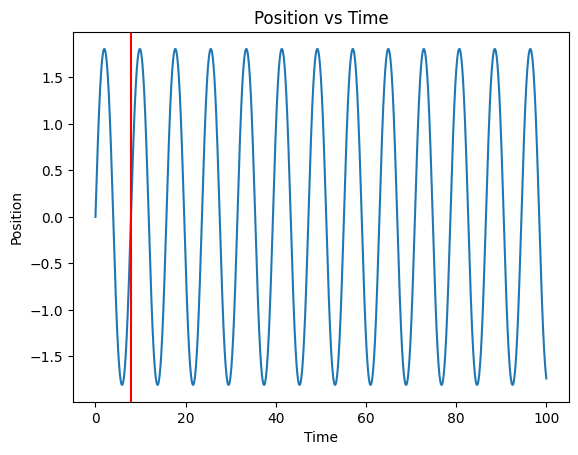

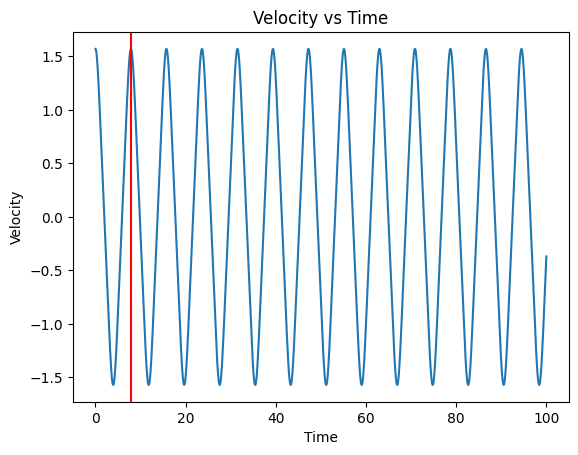

In [7]:
alpha = 1 #frequency     
beta = 0  #driving force
gamma = 0 #damping force
x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
v_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #theta vs t
plt.xlabel("Time") #xlabel
plt.ylabel("Position") #ylabel
plt.title("Position vs Time") #title
plt.axvline(x = 1.2527585191354513*math.pi*2, color = 'r') # marking the time period
plt.show()

plt.plot(t_n4, v_vals4, label = "RK4") #theta dot vs t
plt.xlabel("Time") #xlabel
plt.ylabel("Velocity") #ylabel
plt.title("Velocity vs Time") #title
plt.axvline(x = 1.2527585191354513*math.pi*2, color = 'r') # marking the time period
plt.show()

The graphs behave exactly as we predicted in the situation where there is no damping and driving force. Hence we know that our function for the vertically driven damped planar pendulum works. The red line shows our estimation for the time  period which seems a close approximation based on the initial conditions we have defined. Here we also see that our amplitude is approximately 1.8 which is more than $\frac{\pi}{2}$. This means that the the swing of this pendulum is quite substantial and it goes way above the horizontal. 
Let us now add a some damping force and we should be able to see a sine curve with a gradually decreasing amplitude.

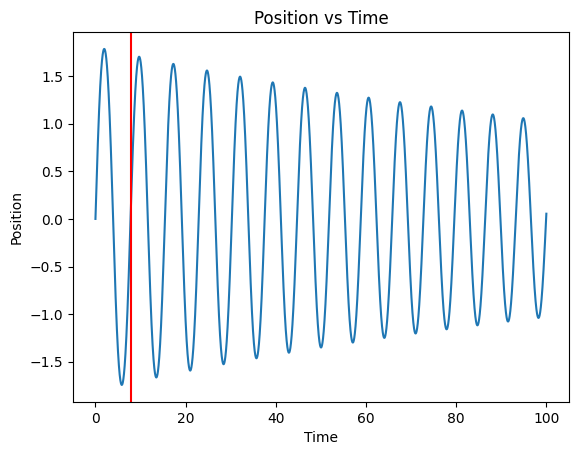

In [8]:
alpha = 1    #frequency                     
beta = 0     #driving force                                   
gamma = 0.01 #damping force                                 
x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #theta vs t
plt.xlabel("Time") #xlabel
plt.ylabel("Position") #ylabel
plt.title("Position vs Time") #title
plt.axvline(x = 1.2527585191354513*math.pi*2, color = 'r') # marking the time period
plt.show()

We were able to predict the behavior again which means that the damping part of our equation works. Here we also see that the period is actually slightly decreasing as the size of the oscillation decreases. This is because because of the relationship between period and amplitude for a pendulum is of direct proportionality. The next thing we will check is the driving force and how it counters the damping. The values $\alpha = 0.5, \beta = 0.1, \gamma = 0.03$ correspond to the stability of the downward state for the system. We will not plot the position vs time graph for these parameters. 

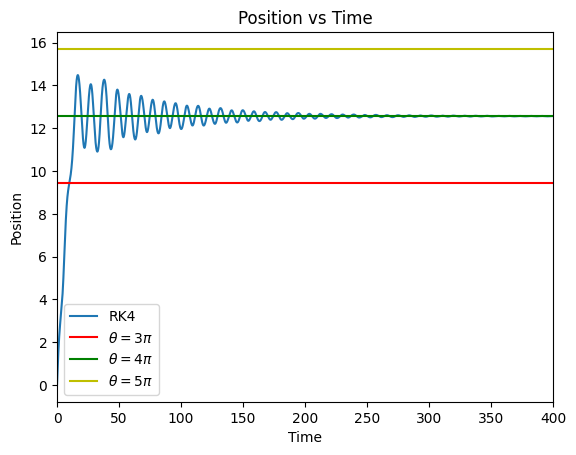

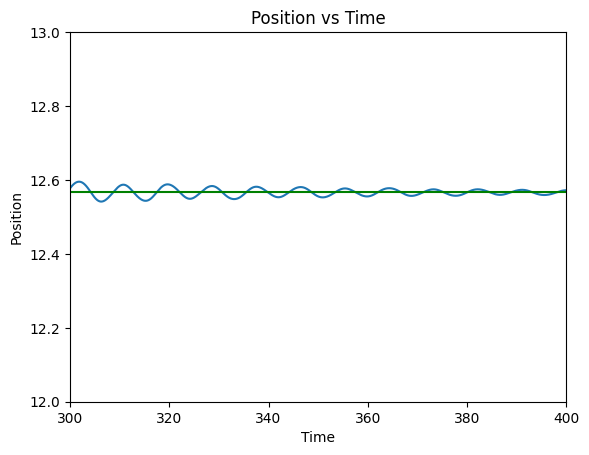

In [9]:
alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.03 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #theta vs t
plt.axhline(y = 3*math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #multiple of pi
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-',label = "$\\theta = 4\\pi$") #multiple of pi
plt.axhline(y = 5*math.pi, color = 'y', linestyle = '-',label = "$\\theta = 5\\pi$") #multiple of pi
plt.xlabel("Time") #xlabel
plt.ylabel("Position") #ylabel
plt.title("Position vs Time") #title
plt.xlim(0, 400) #xrange
plt.legend()
plt.show()

plt.plot(t_n4, x_vals4, label = "RK4") #theta vs t
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-') #multiple of pi

plt.xlabel("Time") #xlabel
plt.ylabel("Position") #ylabel
plt.title("Position vs Time") #title
plt.xlim(300, 400) #xrange
plt.ylim(12,13)
plt.show()

In the plot above, I have changes the initial conditions such that there is a very big transient after which the plot seems to settle into its normal sinusoidal form with the amplitude almost being the same for all the other peaks outside of the transient. It is also worth noting that the pendulum dies down at around $4\pi$ as the pendulum swung around two complete circles before settling down. 

I shall now set the values of $\alpha = 0.1, \beta = 0.545, \gamma = 0.08$. These values correspond to a stable configuration for the upside-down pendulum.

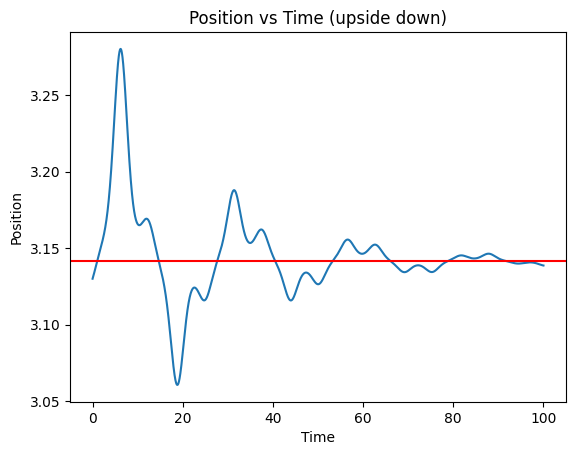

In [10]:
alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.08  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01], 0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #theta vs t
plt.axhline(y = math.pi, color = 'r', linestyle = '-')# pi 
plt.xlabel("Time") #xlabel
plt.ylabel("Position") #ylabel
plt.title("Position vs Time (upside down)") #title
plt.show()

Here we see that the transient behavior dies out pretty soon and we see that the oscillation does settle down after a bit. The initial condition is set very close to $\pi$ in order to explore the upside down stability
I shall now set the values of $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$.  we have stability for both
the upward and downward position of the pendulum. For the downward position, I will set my initial condition to 0 and for the upward one, I will set it to $\pi$

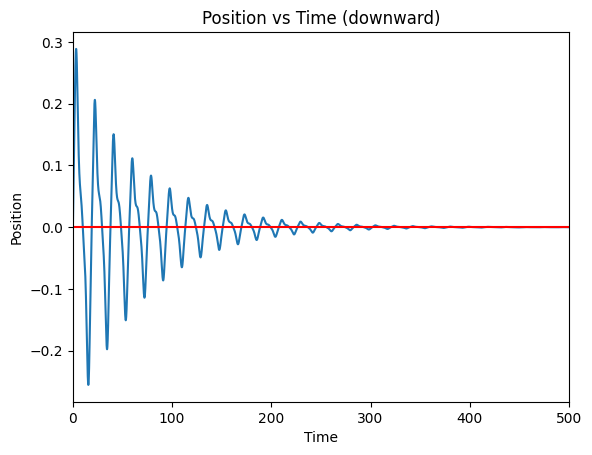

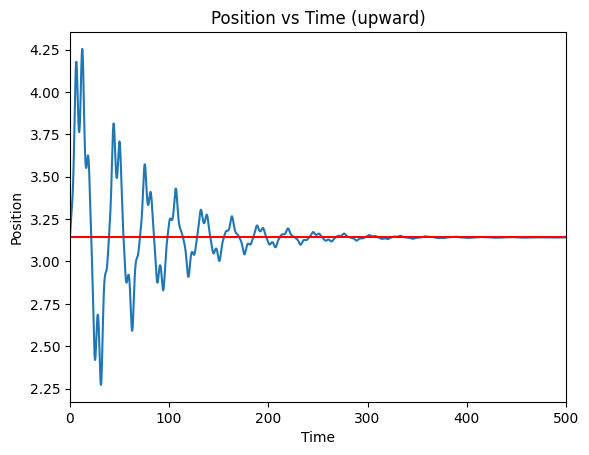

In [11]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #theta vs t
plt.axhline(y = 0, color = 'r', linestyle = '-') #y = 0
plt.xlabel("Time") #xlabel
plt.ylabel("Position") #ylabel
plt.title("Position vs Time (downward)") #title
plt.xlim(0, 500) #xrange
plt.show()

alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [math.pi,0.1],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #theta vs t
plt.axhline(y = math.pi, color = 'r', linestyle = '-') #y = pi
plt.xlabel("Time") #xlabel
plt.ylabel("Position") #ylabel
plt.title("Position vs Time (upward)") #title
plt.xlim(0, 500)  #xrange
plt.show()

We have shown here that those initial conditions do make the pendulum stable after a small transient for both upward and downward.
So far, the pendulum has behaved in the exact predicted manner which suggests that our RK4 method and our equation of motion hold true. 

# Phase Maps, Attractors and Basin of Attractors

So far we have been plotting $\theta $ vs $t$ which can be inferred as a position vs time graph and $\dot{\theta}$ vs $t$ which due to our non dimensionalization can be inferred as a velocity vs time graph or momentum vs time graph. 

The next step would be to plot $\dot{\theta}$ vs $\theta$. this is called the phase map. It is a more accurate graphical representation of the path that the pendulum takes. that space that a phase map covers is referred to as phase space. 

We know that this system has two equilibrium configurations: the downward position and the upward position. Let us now examine the behavior of the pendulum at $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$. We specifically chose these initial parameters because at these parameters we have stability for both the upward and the downward position and five co-existing attractors.

A stable equilibrium state of a pendulum corresponds to the situation in which the mass is stationary and when the mass is moving near that particular equilibrium, it must settle in at that equilibrium position. 

An Attractor is a special stable fixed point or a stable curve in phase space such that  a  small displacement from it will stay near the fixed point or the stable curve. Infact it will eventually fall into the fixed point. 

Here I will first graph all the attractors at the initial conditions $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$

1 down
2 down
3 down
4 down
5 down
6 down


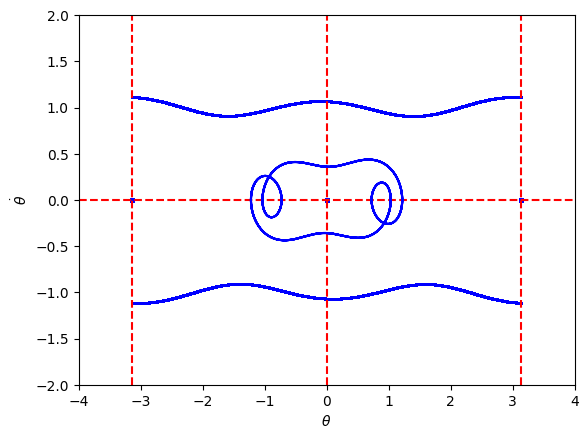

In [12]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

#point at (pi, 0)
x_n4, t_n4 = Rk4(f3, [0,0.5],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list 
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list 
plt.axhline(y = 0, color = 'r', linestyle = '--') #y = 0
plt.axvline(x = math.pi, color = 'r', linestyle = '--') #x = pi
plt.scatter(x_vals4, y_vals4, label = "RK4",s = 5,color = 'blue') #theta dot vs theta
print("1 down")

#point at (0, 0)
x_n4, t_n4 = Rk4(f3, [0,0.4],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
plt.axvline(x = 0, color = 'r', linestyle = '--') # x = 0
plt.scatter(x_vals4, y_vals4, label = "RK4",s = 5,color = 'blue') #theta dot vs theta
print("2 down")

#point at (-pi, 0)
x_n4, t_n4 = Rk4(f3, [-math.pi,0.1], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
plt.axvline(x = -math.pi, color = 'r', linestyle = '--') #x = -pi
plt.scatter(x_vals4, y_vals4, label = "RK4",s = 5,color = 'blue') #theta dot vs theta
print("3 down")

#center diagram
x_n4, t_n4 = Rk4(f3, [0,0.370], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #theta dot vs theta
print("4 down")

#top line
x_n4, t_n4 = Rk4(f3, [0,1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) - np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #theta dot vs theta
print("5 down")

#bottom line
x_n4, t_n4 = Rk4(f3, [0,-1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) + np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #theta dot vs theta
print("6 down")

plt.ylim(-2,2) #yrange
plt.xlim(-4,4)  #xrange
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis

plt.show()

In any given pendulum system, the downward attractor is always the easiest to analyze as it is just the downward equilibrium where the mass just stays still. 

I will first graph the position vs time, velocity vs time and then the phasemap for the same. 

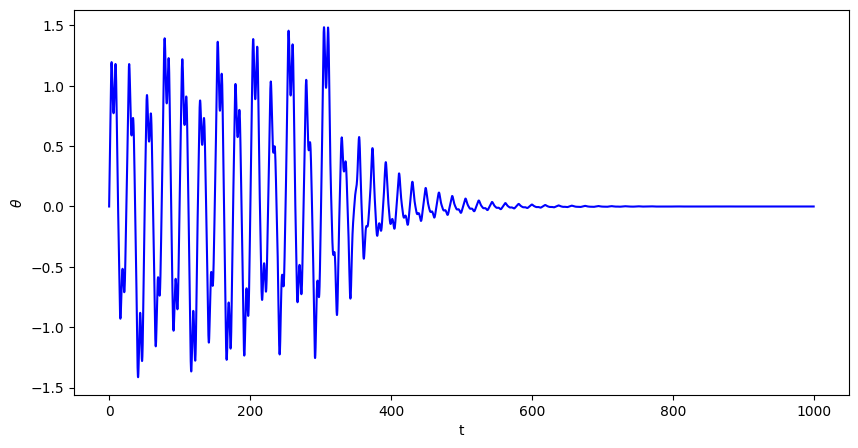

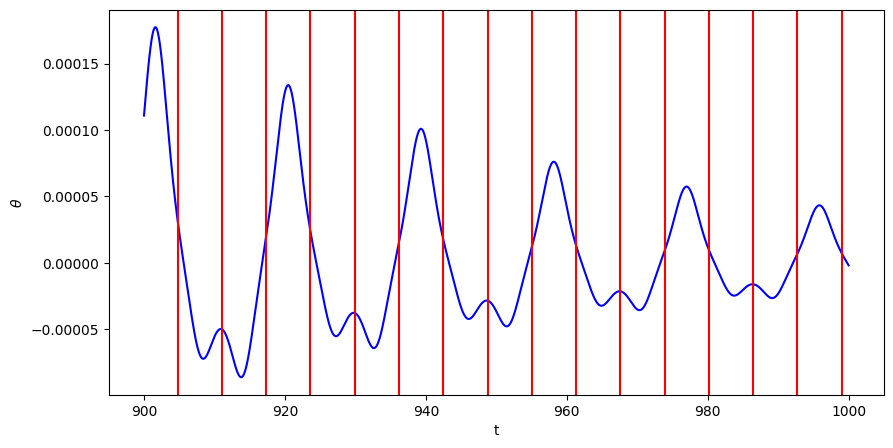

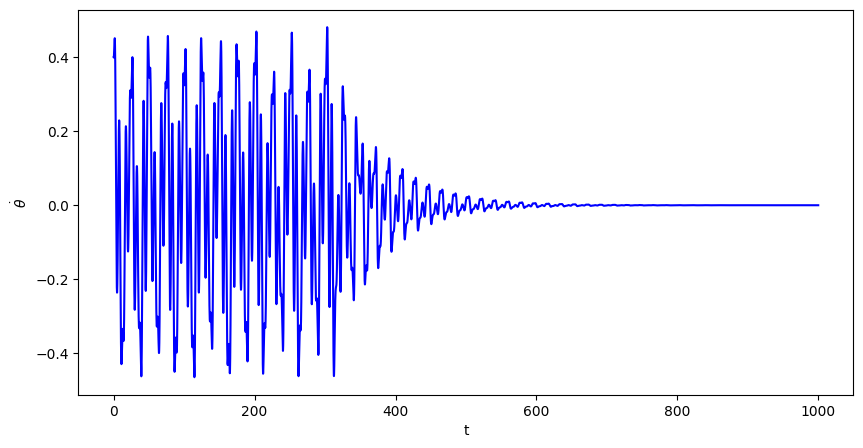

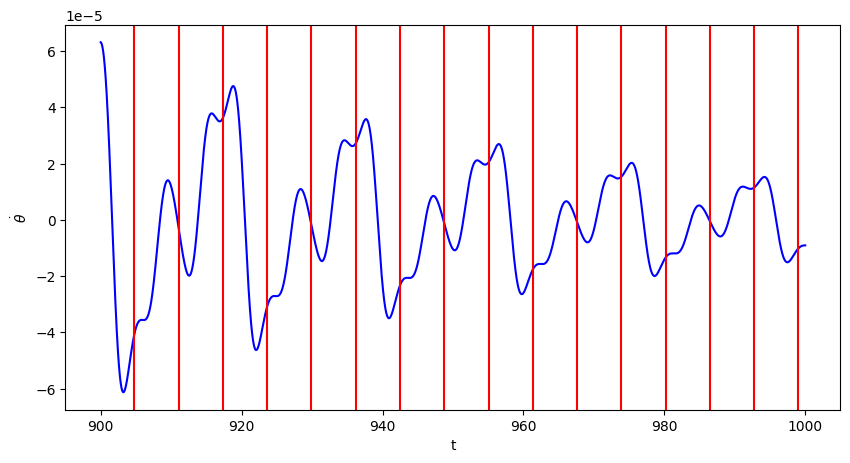

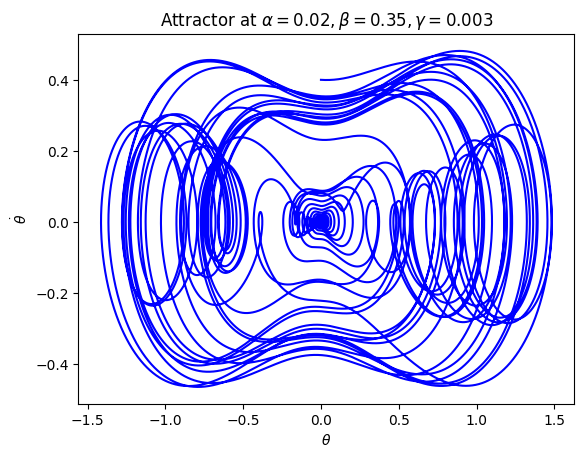

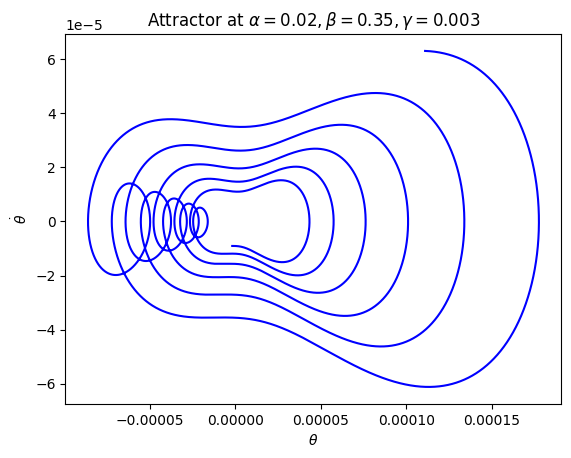

In [13]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 


x_n4, t_n4 = Rk4(f3, [0,0.4],  0.001, 1000000) #using RK4 method
x_vals4_full = np.array([x_n4[i][0]for i in range (len (x_n4))]) # getting position vals from the meshed list
y_vals4_full = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
t_vals4  = [t_n4[i] for i in range (900001,len (t_n4))] #getting time vals from the meshed list

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #theta vs t
plt.ylabel("$\\theta$") #y axis
plt.xlabel("t") # xaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, x_vals4, label = "RK4",color = 'blue') #theta vs t
for i in range(144, 160): #looping to make red pi lines
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\theta$") #x axis
plt.xlabel("t") # yaxis
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs t
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # yaxis
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, y_vals4, label = "RK4",color = 'blue') #theta dot vs t
for i in range(144, 160): #red pi lines
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #red pi lines
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # yaxis
plt.show()

plt.plot(x_vals4_full, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs theta
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()

plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue')#theta dot vs theta
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()


We know that at the downward attractor should go to rest at 0 which as we see settles at  $\theta = 0$ at in the very first plot in this section. On zooming in on the plot we see that it still oscillates with a dying amplitude as it approaches zero. For it to be completely zero we must run the code for an infinite amount to time. We can say the same thing for the velocity vs time plot that it also dies down and tries to settle towards 0. The difference between the 2 red lines on these graphs is $2\pi$. Here we see that the graph repeats its behavior after every 4 red lines which means it take exactly 4 cycles for the pendulum to come back to its initial position and start all over again. 

Lastly we draw the phasemap for this initial condition. While phasemaps are a very good tool to visualize what is actually going on we do lose information about time. Here we expect that after the transient which is visible in the 5th graph, it should settle at the point (0,0) We can see this when we plot the phase map without the transient. 

We shall repeat the same process for the upside down equilibrium position and see it settle at $(\pi, 0)$. 

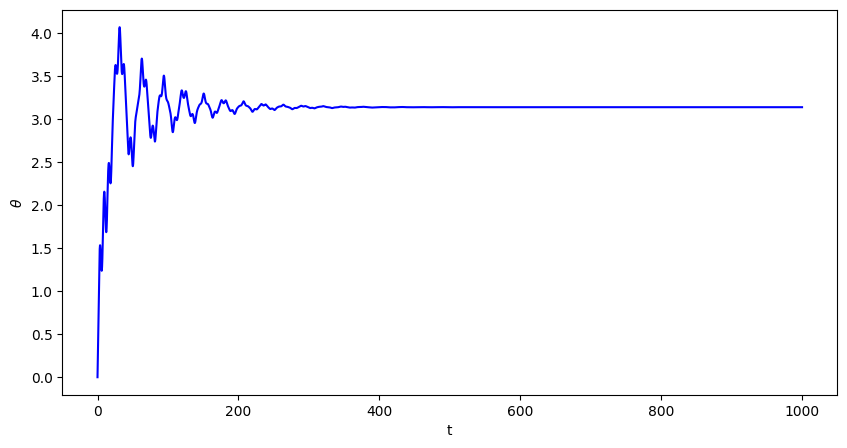

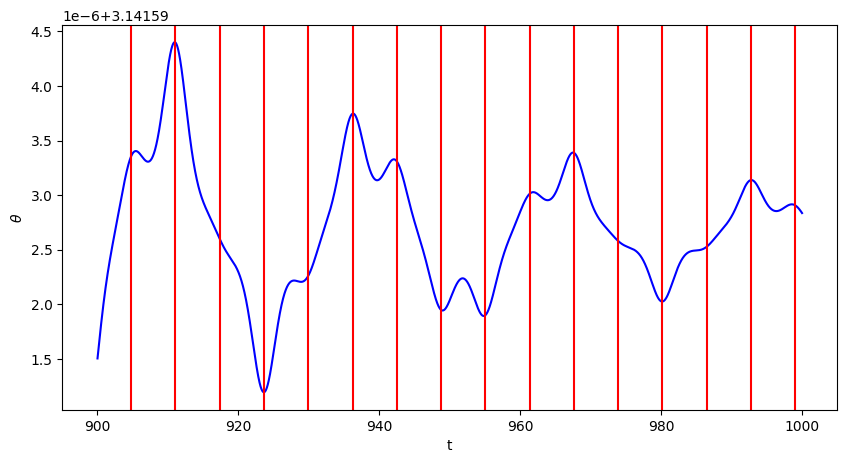

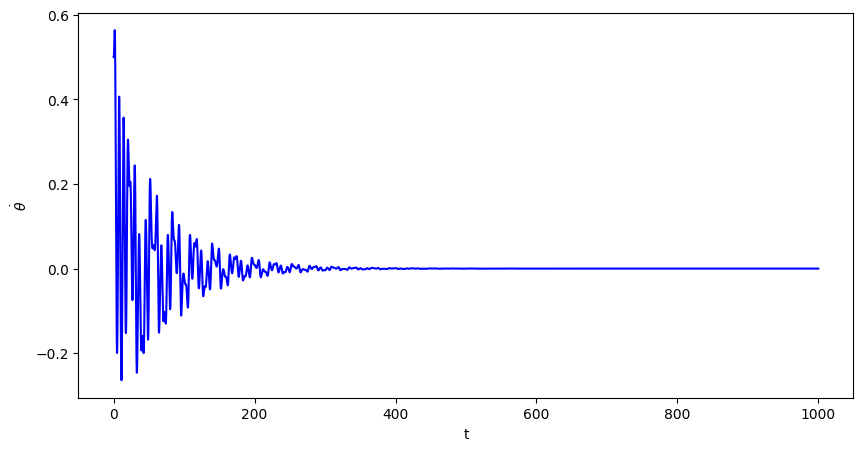

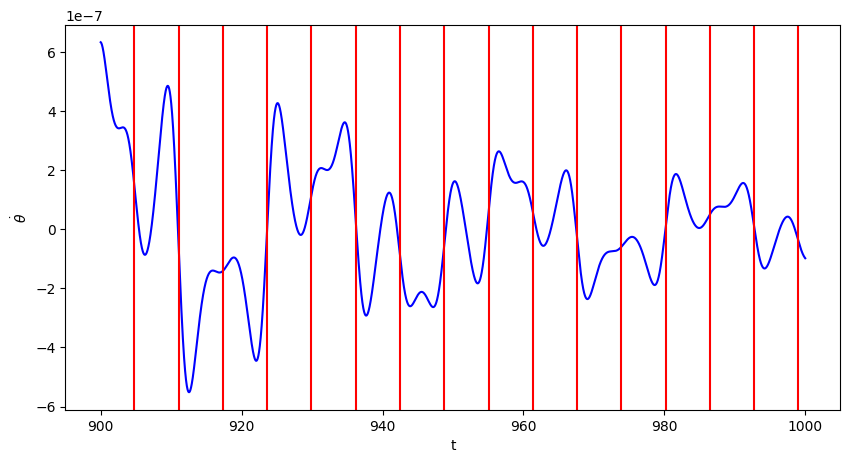

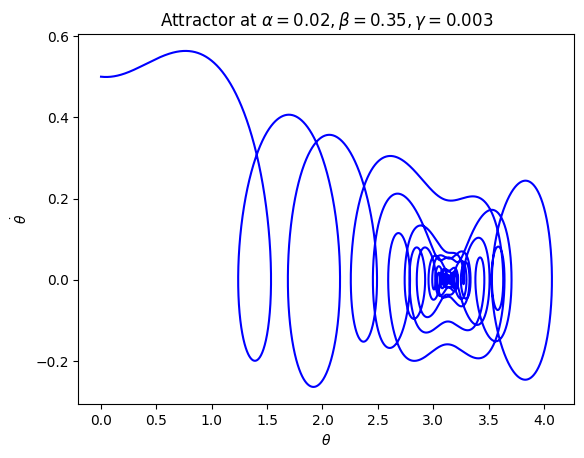

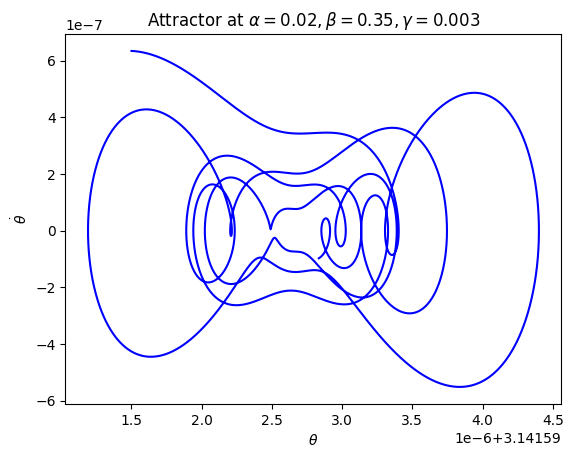

In [14]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 


x_n4, t_n4 = Rk4(f3, [0,0.5],  0.001, 1000000) #using RK4 method
x_vals4_full = np.array([x_n4[i][0]for i in range (len (x_n4))]) # getting position vals from the meshed list
y_vals4_full = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
t_vals4  = [t_n4[i] for i in range (900001,len (t_n4))] #getting time vals from the meshed list

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #theta vs t
plt.ylabel("$\\theta$") #y axis
plt.xlabel("t") # xaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, x_vals4, label = "RK4",color = 'blue')#theta vs t
for i in range(144, 160):#red pi lines
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\theta$") #x axis
plt.xlabel("t") # yaxis
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs t
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # yaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, y_vals4, label = "RK4",color = 'blue') #theta dot vs t
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # yaxis
plt.show()

plt.plot(x_vals4_full, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs theta
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()

plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #theta dot vs theta
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()


The behavior is very similar to what we have for the downward stable state except it settles at a different position. Again here, the red lines indicate a difference of $2\pi$. We shall repeat the same process for a different attractor which is not a point but a stable behavior that the pendulum settles into. 

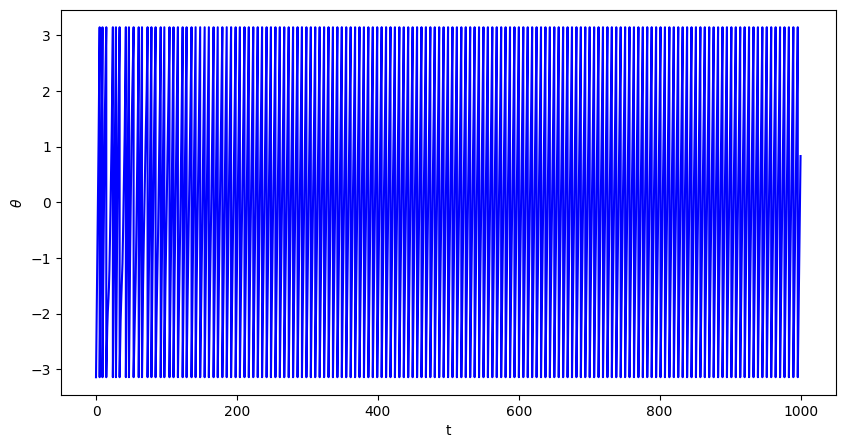

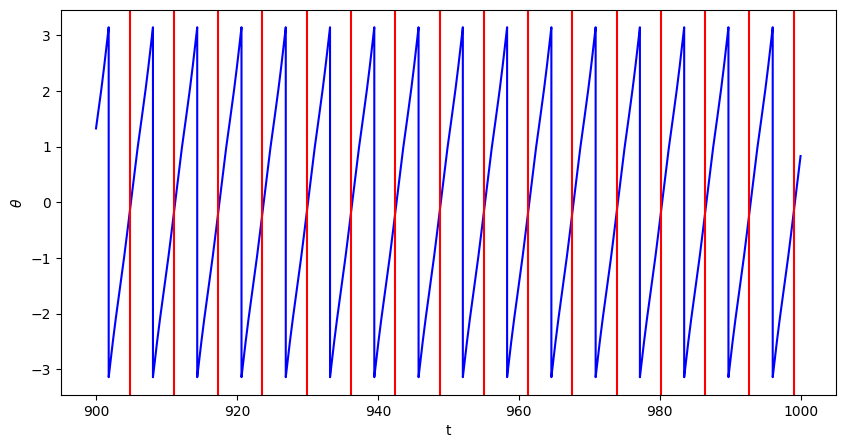

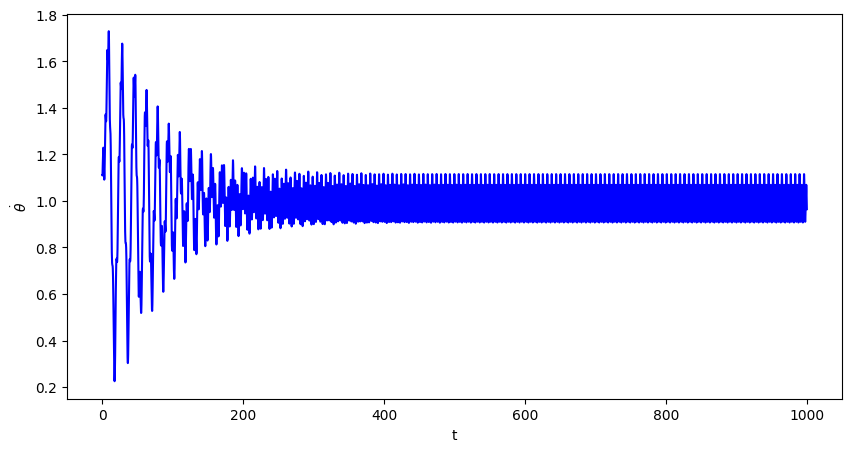

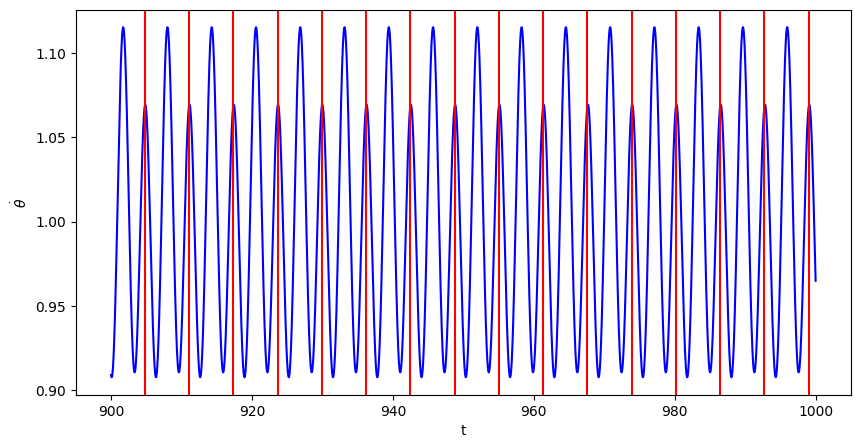

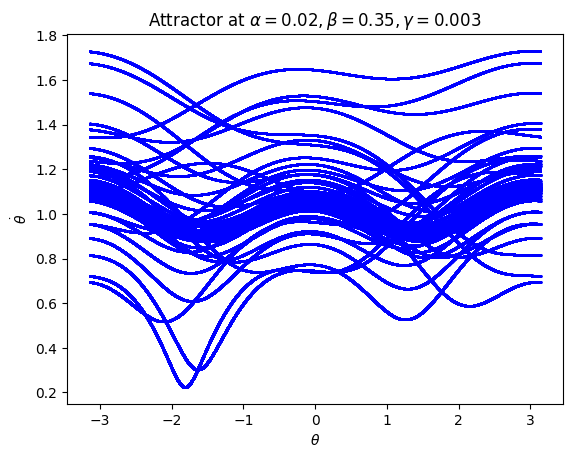

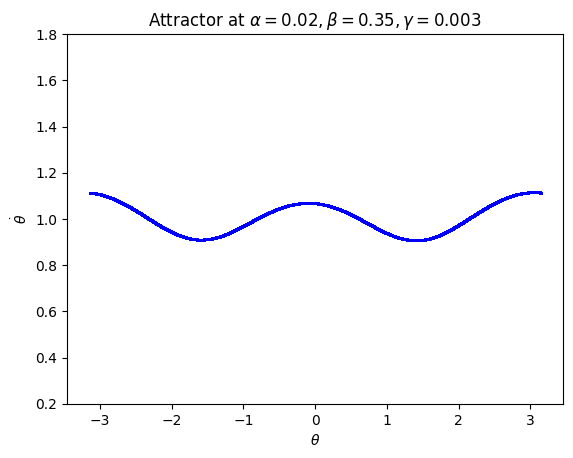

In [15]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 


x_n4, t_n4 = Rk4(f3, [0,1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4_full = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
x_vals4_full = np.fmod(x_vals4_full,2*math.pi) - np.pi #getting it in the range [-pi,pi]
y_vals4_full = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) - np.pi #getting it in the range [-pi,pi]
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
t_vals4  = [t_n4[i] for i in range (900001,len (t_n4))] # getting time vals from the meshed list

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #theta vs t
plt.ylabel("$\\theta$") #y axis
plt.xlabel("t") # xaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, x_vals4, label = "RK4",color = 'blue') #theta vs t
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2pi
    

plt.ylabel("$\\theta$") #x axis
plt.xlabel("t") # xaxis
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs t
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
#plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_vals4, y_vals4, label = "RK4",color = 'blue') #theta dot vs t
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2pi
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
plt.show()

plt.scatter(x_vals4_full, y_vals4_full, label = "RK4",s=1,color = 'blue') #theta dot vs theta
#plt.ylim(-2,2) #yrange
#plt.xlim(-4,4)  #xrange
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()

plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #theta dot vs theta
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.ylim(0.2, 1.8)
plt.show()


Here we have followed the same procedure as above where we graph the position vs time, velocity vs time and then the phasemap with the red lines again denote the same as above. The only difference here is that our pendulum does not settle down to a point but settles into a pattern as seen in the first and the third graph. It is interesting to see what happens when we make sure that all our values are between $-\pi$ and $\pi$. It becomes easier to see how graph 3 is the derivative of graph 1. Another thing here worth observing is that while our initial conditions in for this case are  [0,1.5/1.35], the same can be said for  [0,-1.5/1.35] as it also produces the similar results, but for the upside down configuration. 

We shall repeat the same process for the other type of attractors that do not settle at one point but instead settle into a constant pattern of motion. The constant pattern of motion here is around the point (0,0) on the phasemap but not at (0,0)

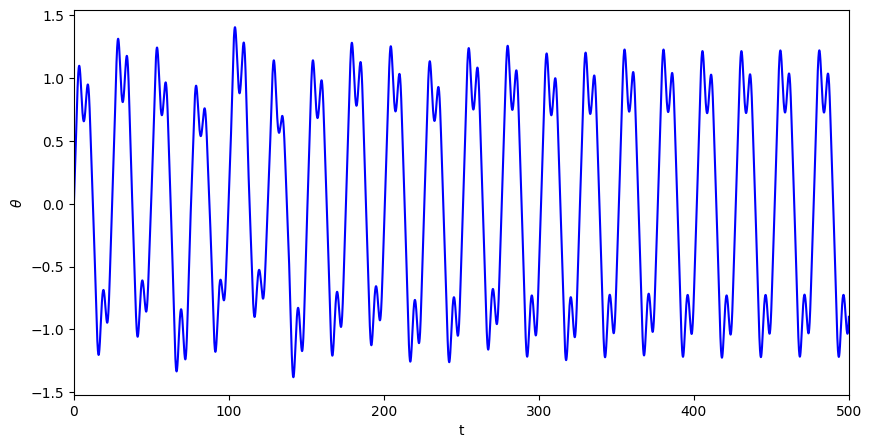

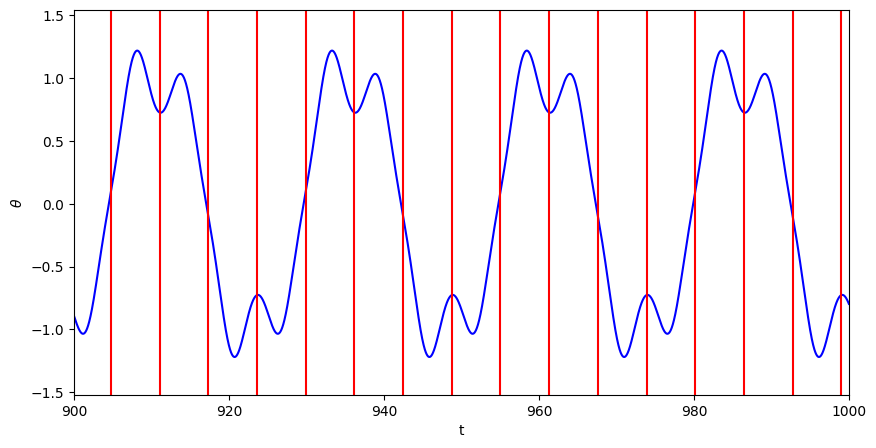

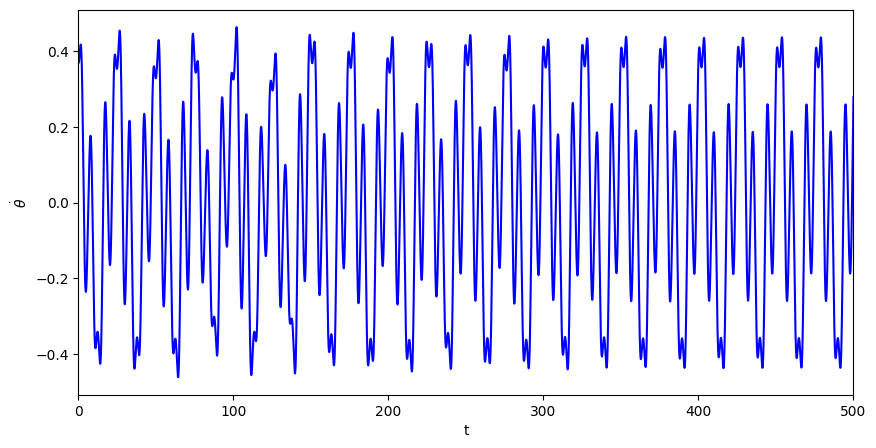

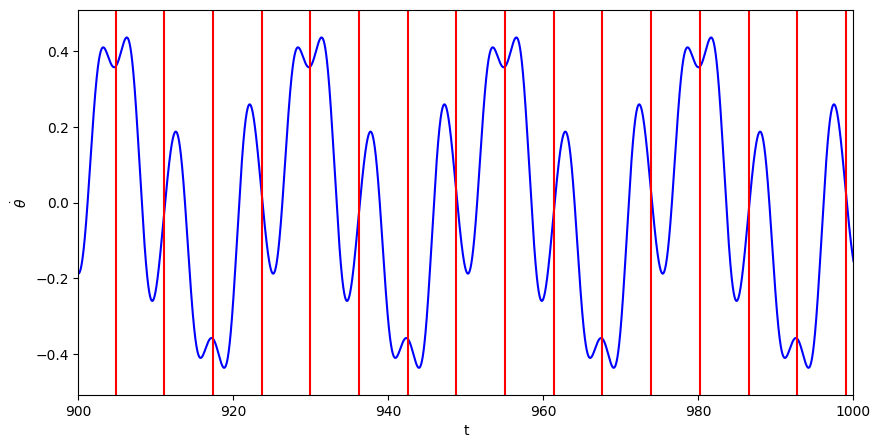

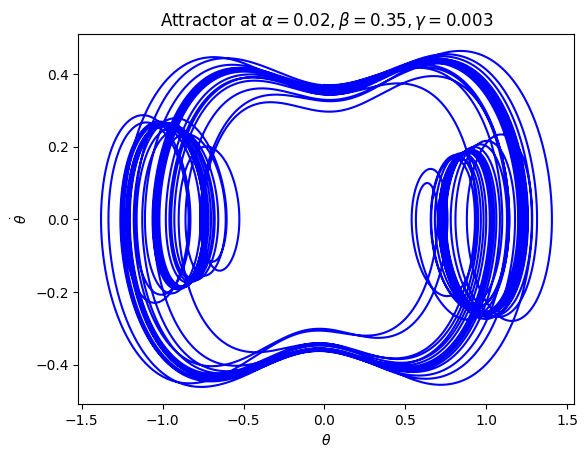

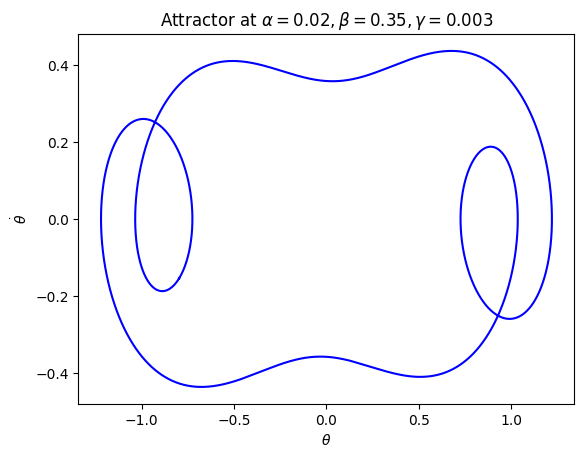

In [16]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 


x_n4, t_n4 = Rk4(f3, [0,0.370], 0.001, 1000000) #using RK4 method
x_vals4_full = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4_full = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

x_vals4 = np.array([x_n4[i][0]for i in range (974869,len (x_n4))])# getting position vals from the meshed list 900001
y_vals4 = np.array([x_n4[i][1]for i in range (974869,len (x_n4))])# getting velocity vals from the meshed list 900001
t_vals4  = [t_n4[i] for i in range (974869,len (t_n4))]# getting time vals from the meshed list 974869

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #theta vs t
plt.ylabel("$\\theta$") #y axis
plt.xlabel("t") # xaxis
plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, x_vals4_full, label = "RK4",color = 'blue') #theta vs t
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\theta$") #x axis
plt.xlabel("t") # xaxis
plt.xlim(900,1000)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs t
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
plt.xlim(0,500)  #xrange
plt.show()

plt.figure(figsize=(10, 5)) #customizing the figure size
plt.plot(t_n4, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs t
for i in range(144, 160):
    plt.axvline(x = i*(2*math.pi), color = 'r', linestyle = '-') #y = 2*pi
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("t") # xaxis
plt.xlim(900,1000)  #xrange
plt.show()

plt.plot(x_vals4_full, y_vals4_full, label = "RK4",color = 'blue') #theta dot vs theta
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()

plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #theta dot vs theta
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title
plt.show()



Here we again have the same exact interpretation for these graphs where we see the pendulum settling into a particular pattern. Interestingly the graph repeats its behavior after every 4 red lines which means it take exactly 4 cycles for the pendulum to come back to its initial position and start all over again. 

Now that We have looked at each of the five attractors, let us not try and understand what a basin of attraction is for each of these attractors. 

A basin of attraction is a set of points from which a dynamical system spontaneously moves to a particular attractor.

We will also try and find the basin of attraction for each of the attractor. Before that let us write down some code which creates and saves a list of all the points for a given attractor after we remove their transients. 

In [17]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force 
list_center = [[0,0]] #attractor 1
list_right_left = [[math.pi,0], [-math.pi,0]] #attractor 2
#center round attractor 5
list_center_round_x_n4_full, list_center_round_t_n4_full = Rk4(f3, [0,0.370], 0.001, 1000000) #using RK4 method
list_center_round = list_center_round_x_n4_full[974869:] #removing the transient

print("done 1")

#up attractor3
list_up_x_n4_full, list_up_t_n4_full = Rk4(f3, [0,1.5/1.35], 0.001, 1000000) #using RK4 method
list_up = list_up_x_n4_full[993717:] #removing the transient
list_up_x = np.array([list_up[i][0]for i in range (len (list_up))])# getting position vals from the meshed list
list_up_x = [convert_theta(x) for x in list_up_x]#getting it in the range [-pi,pi]
list_up = np.array([[list_up_x[i],list_up[i][1]] for i in range (len(list_up_x))]) #getting the 2 d list back together


print("done 2")


#down attractor 4
list_down_x_n4_full, list_down_t_n4_full = Rk4(f3, [0,-1.5/1.35], 0.001, 1000000) #using RK4 method
list_down = list_down_x_n4_full[993717:]
list_down_x = np.array([list_down[i][0]for i in range (len (list_down))])# getting position vals from the meshed list
list_down_x = [convert_theta(x) for x in list_down_x]#getting it in the range [-pi,pi]
list_down = np.array([[list_down_x[i],list_down[i][1]] for i in range (len(list_down_x))]) #getting the 2 d list back together


print("done 3")

done 1
done 2
done 3


The above code makes 5 lists, one corresponding to each attractor. We had earlier defined another method called the fast RK4 method. The main difference between the main RK4 method and the fast RK4 method is that the main RK4 method saves all the values in a list and returns a list of all the positions, velocities and times whereas the fast RK4 only returns the last position velocity and time. 
We will now use the fast RK4 get the final positions and velocities, check them against the lists we just made. If the value of the fast RK4 is within the tolerance limit of one of the values in the above lists then we will know that if the pendulum starts at that initial position then it will end up at that attractor

In [18]:
def tolerance(rk4_output, xi, epsilon): #seeing if a value is in the tolerance range
    for y in xi: #checking for each value
        if (rk4_output[0] - y[0])**2 +(rk4_output[1] - y[1])**2 <= epsilon**2: #if in the range return true
            return True
    return False #else return false

The above function returns true if a final condition falls in any basin of attraction

In [19]:
def attractor_check(): #checking which attractor a particular iniital condition goes to
    epsilon = 10**(-3) #tolerance
    initial_point = [random.uniform(-math.pi,math.pi),random.uniform(-math.pi/2,math.pi/2)] #getting a random initial condition
    final_point = fast_Rk4(f3, initial_point,  0.001, 1000000) #using RK4 method
    if (tolerance(final_point, list_center, epsilon)):  #checking if this goes to attractor 1
        return [initial_point, 1]
    elif (tolerance(final_point, list_right_left, epsilon)): #checking if this goes to attractor 2
        return [initial_point, 2]
    elif (tolerance(final_point, list_up, epsilon)): #checking if this goes to attractor 3
        return [initial_point, 3]
    elif (tolerance(final_point, list_down, epsilon)): #checking if this goes to attractor 4
        return [initial_point, 4]
    elif (tolerance(final_point, list_center_round, epsilon)): #checking if this goes to attractor 5
        return [initial_point, 5]
    else:
        return [initial_point, 0] #incase the initial condition is not in any basin

The above function generates a random initial condition in our phase space, calculates the final point using the fast RK4 returns the initial point and the attractor it ends up in

In [ ]:
#DO NOT RUN THE FOLLOWING BLOCK OF CODE
x = True #condition for infinite while
i = 1 #no of collected data points
while (x): #infinite while 
    list_to_write = attractor_check() #getting the initial condition and which attractor it settles into
    if list_to_write[-1] == 1: # if it setles into attractor 1 then...
        list_to_write = list_to_write[0] #getting the initial condition
        with open('/Users/Physics Student/Desktop/Manav_physics_310__data/attractor_1.csv', 'a') as f_object1: #opening the file to store the initial point.
            writer_object = writer(f_object1) # Pass this file object to csv.writer() and get a writer object
            writer_object.writerow(list_to_write)# Pass the list as an argument into the writerow()
            f_object1.close()# Close the file object
    elif list_to_write[-1] == 2: # if it setles into attractor 1 then...
        list_to_write = list_to_write[0]  #getting the initial condition
        with open('/Users/Physics Student/Desktop/Manav_physics_310__data/attractor_2.csv', 'a') as f_object2:#opening the file to store the initial point.
            writer_object = writer(f_object2) # Pass this file object to csv.writer() and get a writer object
            writer_object.writerow(list_to_write)# Pass the list as an argument into the writerow()
            f_object2.close()# Close the file object
    elif list_to_write[-1] == 3: # if it setles into attractor 1 then...
        list_to_write = list_to_write[0]  #getting the initial condition
        with open('/Users/Physics Student/Desktop/Manav_physics_310__data/attractor_3.csv', 'a') as f_object3:#opening the file to store the initial point.
            writer_object = writer(f_object3) # Pass this file object to csv.writer() and get a writer object
            writer_object.writerow(list_to_write)# Pass the list as an argument into the writerow()
            f_object3.close()# Close the file object
    elif list_to_write[-1] == 4: # if it setles into attractor 1 then...
        list_to_write = list_to_write[0]  #getting the initial condition
        with open('/Users/Physics Student/Desktop/Manav_physics_310__data/attractor_4.csv', 'a') as f_object4:#opening the file to store the initial point.
            writer_object = writer(f_object4) # Pass this file object to csv.writer() and get a writer object
            writer_object.writerow(list_to_write)# Pass the list as an argument into the writerow()
            f_object4.close()# Close the file object
    elif list_to_write[-1] == 5: # if it setles into attractor 1 then...
        list_to_write = list_to_write[0]  #getting the initial condition
        with open('/Users/Physics Student/Desktop/Manav_physics_310__data/attractor_5.csv', 'a') as f_object5:#opening the file to store the initial point.
            writer_object = writer(f_object5) # Pass this file object to csv.writer() and get a writer object
            writer_object.writerow(list_to_write)# Pass the list as an argument into the writerow()
            f_object5.close()# Close the file object
    else: #pass if it doesnt go to any intial condition. 
        pass
    print (i) #printing the number of collected data points
    i = i+1 #updating the number of data points

The above code updated 5 different .csv files depending on which attractor an initial condition lands into and appends each .csv file accordingly. Next we will plot all of these initial conditions in phase space and color code them depending on which particular attractor they fall into, which makes up each attractors basin of attraction. We will also draw each attractor on this plot in order to have a better understanding. 

1 down
2 down
3 down
4 down
5 down
6 down


C:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


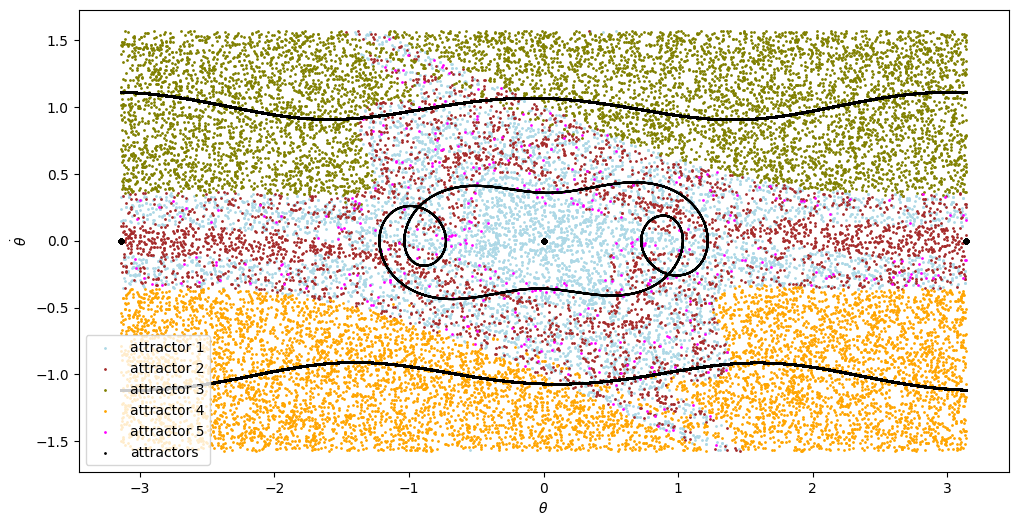

In [20]:
point_size = 1 #declaring the sixe of all points on the plot. 
plt.figure(figsize=(12, 6)) #declaring the size of the figure
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(1)/attractor_1.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "lightblue") #plotting attractor_1
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(2)/attractor_1.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "lightblue")#plotting attractor_1
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(3)/attractor_1.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "lightblue")#plotting attractor_1
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(4)/attractor_1.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "lightblue")#plotting attractor_1
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(5)/attractor_1.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "lightblue")#plotting attractor_1
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(6)/attractor_1.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, label = "attractor 1", color  = "lightblue") #plotting attractor_1

spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(1)/attractor_2.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "brown") #plotting attractor_2
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(2)/attractor_2.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "brown") #plotting attractor_2
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(3)/attractor_2.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "brown")#plotting attractor_2
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(4)/attractor_2.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "brown")#plotting attractor_2
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(5)/attractor_2.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "brown")#plotting attractor_2
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(6)/attractor_2.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, label = "attractor 2",color  = "brown")#plotting attractor_2

spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(1)/attractor_3.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "olive") #plotting attractor_3
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(2)/attractor_3.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "olive")#plotting attractor_3
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(3)/attractor_3.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "olive")#plotting attractor_3
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(4)/attractor_3.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "olive")#plotting attractor_3
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(5)/attractor_3.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,color  = "olive")#plotting attractor_3
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(6)/attractor_3.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, label = "attractor 3",color  = "olive")#plotting attractor_3

spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(1)/attractor_4.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color  = "orange") #plotting attractor_4
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(2)/attractor_4.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,  color  = "orange") #plotting attractor_4
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(3)/attractor_4.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,  color  = "orange") #plotting attractor_4
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(4)/attractor_4.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,  color  = "orange") #plotting attractor_4
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(5)/attractor_4.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,  color  = "orange") #plotting attractor_4
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(6)/attractor_4.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, label = "attractor 4", color  = "orange") #plotting attractor_4

spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(1)/attractor_5.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,  color = "magenta") #plotting attractor_5
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(2)/attractor_5.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color = "magenta") #plotting attractor_5
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(3)/attractor_5.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, color = "magenta") #plotting attractor_5
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(4)/attractor_5.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,  color = "magenta") #plotting attractor_5
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(5)/attractor_5.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size,  color = "magenta") #plotting attractor_5
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/Manav_physics_310__data(6)/attractor_5.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y, s = point_size, label = "attractor 5", color = "magenta") #plotting attractor_5

alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force   


#point at (pi, 0)
x_n4, t_n4 = Rk4(f3, [0,0.5],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
plt.scatter(x_vals4, y_vals4,s = 10,color = 'black') #theta dot vs theta
print("1 down")

#point at (0, 0)
x_n4, t_n4 = Rk4(f3, [0,0.4],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
plt.scatter(x_vals4, y_vals4,s = 10,color = 'black') #theta dot vs theta
print("2 down")

#point at (-pi, 0)
x_n4, t_n4 = Rk4(f3, [-math.pi,0.1], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
plt.scatter(x_vals4, y_vals4,s = 10, color = 'black') #theta dot vs theta
print("3 down")

#center diagram
x_n4, t_n4 = Rk4(f3, [0,0.370], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
plt.plot(x_vals4, y_vals4,color = 'black') #theta dot vs theta
print("4 down")

#top line
x_n4, t_n4 = Rk4(f3, [0,1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) - np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4,s=1,color = 'black') #theta dot vs theta
print("5 down")

#bottom line
x_n4, t_n4 = Rk4(f3, [0,-1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting velocity vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) + np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4,s=1,color = 'black', label = "attractors") #theta dot vs theta
print("6 down")

plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis

plt.legend()


plt.show()

Here we see that all the  random initial conditions in our phase space that would end up at an attractor are color coded and plotted in the graph above. We see that all the blue points make up the basin of attraction for the attractor at (0,0). All the red points form the basin of attraction for the point (0,$\pi$) and (0,$-\pi$) which are essentially the same point. All the green points forms the basin of attraction at the top and the orange points form the basin of attraction at the bottom of the graph. The pink points form the basin of attraction for the central attractor. 

## Future work

An extension to my work so far would be to understand the attractors and the basin of attractors at other parameters at they are unique tom each parameter set. I have started some exploration here. 
1)alpha = 0.5                               
beta = 0.1                            
gamma = 0.03

2)alpha = 0.1                             
beta = 0.545                          
gamma = 0.08 

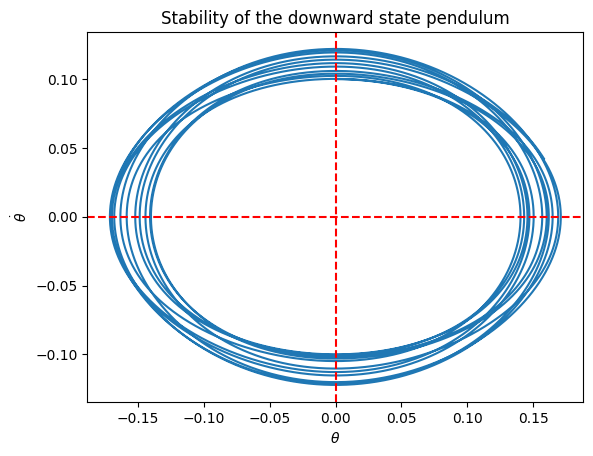

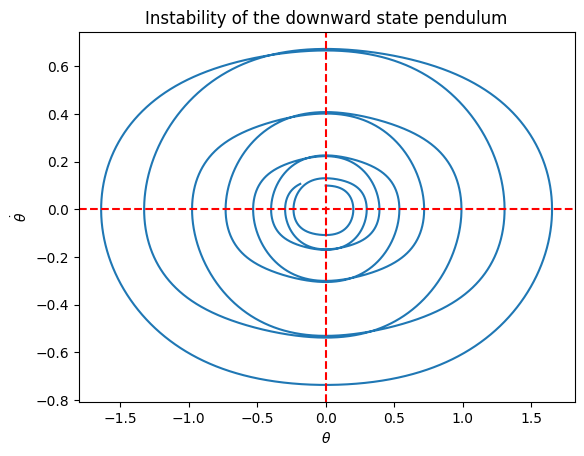

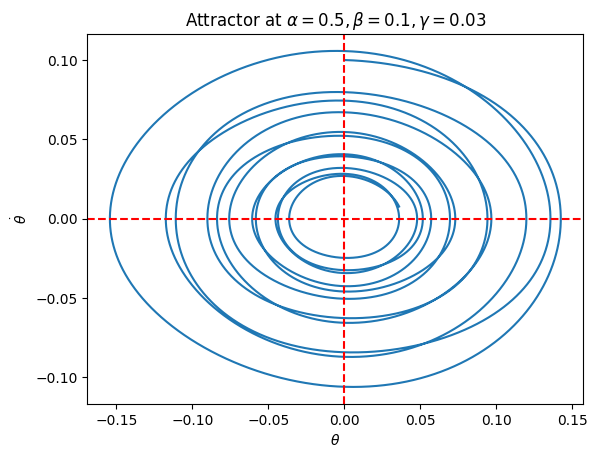

In [21]:
alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.0 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #theta dot vs theta
plt.axhline(y = 0, color = 'r', linestyle = '--') #y = 0
plt.axvline(x = 0, color = 'r', linestyle = '--') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Stability of the downward state pendulum") #title
plt.show()

alpha = 0.25  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.0 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #theta dot vs theta
plt.axhline(y = 0, color = 'r', linestyle = '--') #y = 0
plt.axvline(x = 0, color = 'r', linestyle = '--') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Instability of the downward state pendulum") #title
plt.show()

alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.03 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #theta dot vs theta
plt.axhline(y = 0, color = 'r', linestyle = '--') #y = 0
plt.axvline(x = 0, color = 'r', linestyle = '--') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha =0.5, \\beta = 0.1, \\gamma = 0.03 $") #title
plt.show()

We first graph the phase map that shows stability. Since we have non dimensionalized our equation of motion, $\dot{\theta}$ is essentially our dimensionless momentum. Thereby we are essentially graphing momentum vs position. The uniform circle we see in graph one basically shows stability. I could graph more such concentric circles which would show multiple attractors. 

I have also shown an unstable version at slightly different parameters. 

The last graph shows the attractor. Here I have left out the transient in the graph and we also that since this is the downward equilibrium, th concentric circles at (0,0)

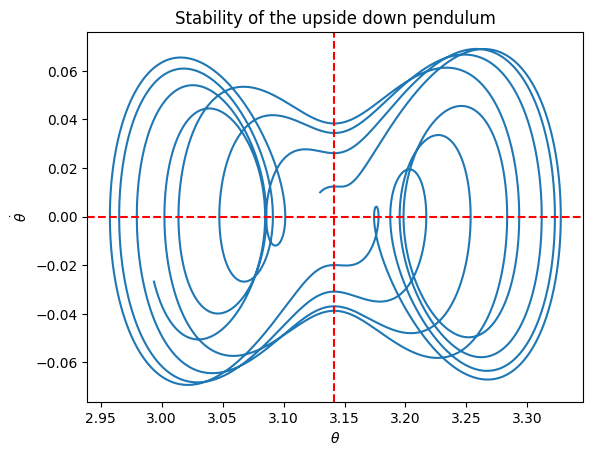

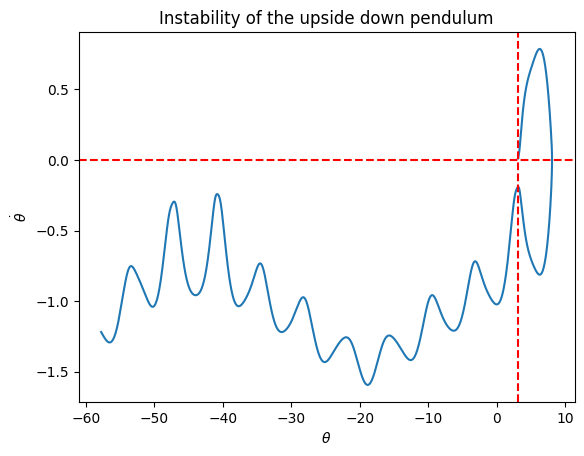

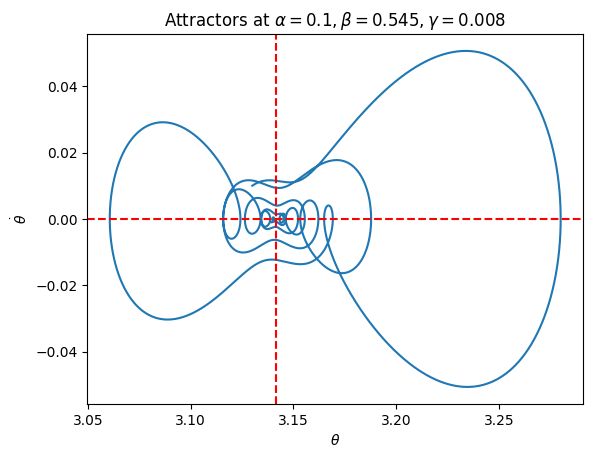

In [22]:
alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.0  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4")  #theta dot vs theta
plt.axvline(x = math.pi, color = 'r',linestyle = '--') #x = pi
plt.axhline(y = 0, color = 'r', linestyle = '--') #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Stability of the upside down pendulum") #title
plt.show()

alpha = 0.2  #frequency                             
beta = 0.1  #driving force                               
gamma = 0.0  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4")  #theta dot vs theta
plt.axvline(x = math.pi, color = 'r',linestyle = '--') #x = pi
plt.axhline(y = 0, color = 'r', linestyle = '--') #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Instability of the upside down pendulum") #title
plt.show()

alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.08  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting velocity vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4")  #theta dot vs theta
plt.axvline(x = math.pi, color = 'r',linestyle = '--') #x = pi
plt.axhline(y = 0, color = 'r', linestyle = '--') #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.1, \\beta = 0.545, \\gamma = 0.008$") #title
plt.show()

We again follow the same method of making a stable. unstable and an attractors graph. here the parameters we use are at the upward stability hence our graphs are centered around (pi, 0). 